In [1]:
import pandas as pd

#Reading Product Review data with Pandas
review = pd.read_excel("product_reviews.xlsx")

In [2]:
review

,ReviewID,Category,ReviewText,Rating,SentimentLabel,ReviewDate
0,1,Clothing,"Very disappointed, it stopped working after a ...",1,negative,2024-10-11
1,2,Toys,"Very useful and well-designed, worth every penny.",5,positive,2025-05-30
2,3,Books,Poor quality and not as described.,1,negative,2025-03-15
3,4,Electronics,"Not bad, but not great either.",2,neutral,2025-05-13
4,5,Clothing,"Not bad, but not great either.",3,neutral,2025-02-05
...,...,...,...,...,...,...
95,96,Clothing,It’s acceptable for the price.,4,neutral,2025-03-15
96,97,Toys,"Not worth the money, very low quality.",2,negative,2024-10-31
97,98,Toys,I am impressed with the performance and durabi...,4,positive,2024-11-14
98,99,Books,"Very disappointed, it stopped working after a ...",2,negative,2024-12-29


In [3]:
#Regex example for cleaning and normalizing text

import re

review_ex = "Absolutely LOVE this product!!! Works 100% as expected... Visit http://example.com or www.shop.test 😊"

# 1) Find all URLs
urls = re.findall(r"(https?://\S+|www\.\S+)", review_ex)

# 2) Remove any character that is not a letter or space
letters_only = re.sub(r"[^A-Za-z\s]", " ", review_ex)


print("URLs:", urls)
print("Letters only:", letters_only)

URLs: ['http://example.com', 'www.shop.test']
Letters only: Absolutely LOVE this product    Works      as expected    Visit http   example com or www shop test  


In [4]:
import nltk
# nltk.download("punkt")  # run once
from nltk.tokenize import word_tokenize

tokens = word_tokenize(review_ex)
cleaned = " ".join(t.lower() for t in tokens if t.isalpha())
print(cleaned)

absolutely love this product works as expected visit http or


In [5]:
tokens = word_tokenize(letters_only)
cleaned_nltk = " ".join(t.lower() for t in tokens if t.isalpha())

print("Cleaned (regex + NLTK):", cleaned_nltk)

Cleaned (regex + NLTK): absolutely love this product works as expected visit http example com or www shop test


In [6]:
import nltk
# nltk.download("stopwords")   # run once

from nltk.corpus import stopwords

tokens = word_tokenize(cleaned_nltk)
tokens = [t.lower() for t in tokens if t.isalpha()]

# build a stopword set and (optionally) preserve negations for sentiment tasks
stops = set(stopwords.words("english"))
stops -= {"not", "no", "never"}  # keep negations

# remove stopwords and add simple length filter to drop very short tokens
tokens_nostop = [t for t in tokens if t not in stops and len(t) > 2]

print(tokens_nostop)

['absolutely', 'love', 'product', 'works', 'expected', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']


In [7]:
#Stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

porter_stems = [porter.stem(t) for t in tokens_nostop]
print("Tokens       :", tokens_nostop)
print("Porter stems :", porter_stems)

Tokens       : ['absolutely', 'love', 'product', 'works', 'expected', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']
Porter stems : ['absolut', 'love', 'product', 'work', 'expect', 'visit', 'http', 'exampl', 'com', 'www', 'shop', 'test']


In [8]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

lemmas = [wnl.lemmatize(t) for t in tokens_nostop]
print("Tokens  :", tokens_nostop)
print("Lemmas  :", lemmas)

Tokens  : ['absolutely', 'love', 'product', 'works', 'expected', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']
Lemmas  : ['absolutely', 'love', 'product', 'work', 'expected', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']


In [9]:
# nltk.download("averaged_perceptron_tagger_eng")          # run once

pos_tags = nltk.pos_tag(tokens_nostop) 
print(pos_tags)

[('absolutely', 'RB'), ('love', 'JJ'), ('product', 'NN'), ('works', 'NNS'), ('expected', 'VBD'), ('visit', 'NN'), ('http', 'NN'), ('example', 'NN'), ('com', 'NN'), ('www', 'NN'), ('shop', 'NN'), ('test', 'NN')]


In [10]:
from nltk.corpus import wordnet

# nltk.download("wordnet") # run once

# map NLTK’s POS tags to WordNet POS tags
def to_wordnet_pos(treebank_tag: str) -> str:
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if unknown

pos_tags = nltk.pos_tag(tokens_nostop)
wnl = WordNetLemmatizer()
lemmas_pos = [wnl.lemmatize(t, to_wordnet_pos(pos)) for t, pos in pos_tags]

print("Tokens :", tokens_nostop)
print("Lemmas :", lemmas_pos)

Tokens : ['absolutely', 'love', 'product', 'works', 'expected', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']
Lemmas : ['absolutely', 'love', 'product', 'work', 'expect', 'visit', 'http', 'example', 'com', 'www', 'shop', 'test']


In [11]:
import pandas as pd
from collections import Counter

# Sample documents
docs = {
    "d1": "love this product",
    "d2": "this product works",
    "d3": "absolutely love it"
}

# Tokenize by simple split
tokenized_docs = {doc_id: text.lower().split() for doc_id, text in docs.items()}

# Build vocabulary (sorted)
vocab = sorted({word for tokens in tokenized_docs.values() for word in tokens})

# Create Bag-of-Words matrix
bow_data = {}
for doc_id, tokens in tokenized_docs.items():
    counts = Counter(tokens)
    bow_data[doc_id] = [counts.get(word, 0) for word in vocab]

# Convert to DataFrame
df_bow = pd.DataFrame.from_dict(bow_data, orient="index", columns=vocab)

df_bow


,absolutely,it,love,product,this,works
d1,0,0,1,1,1,0
d2,0,0,0,1,1,1
d3,1,1,1,0,0,0


In [12]:
#BoW with Scikit-Learn
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
X = bow.fit_transform(review['ReviewText'])  

print("Vocabulary:", bow.get_feature_names_out()[:10])
print("Shape:", X.shape)
print("BoW Sample:\n", X.toarray())


Vocabulary: ['about' 'absolutely' 'acceptable' 'after' 'again' 'alternatives' 'am'
 'and' 'are' 'as']
Shape: (100, 74)
BoW Sample:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [13]:
# Include both unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(review['ReviewText'])

print("Vocabulary:", vectorizer.get_feature_names_out()[:10])

Vocabulary: ['about' 'about it' 'absolutely' 'absolutely love' 'acceptable'
 'acceptable for' 'after' 'after week' 'again' 'alternatives']


In [14]:
# min_df=2  : keep terms appearing in at least 2 documents
# max_df=0.9: drop terms appearing in >90% of documents
vectorizer = CountVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words="english"
)

X = vectorizer.fit_transform(review['ReviewText'])
print("Vocabulary   :", vectorizer.get_feature_names_out()[:10])

Vocabulary   : ['absolutely' 'absolutely love' 'acceptable' 'acceptable price'
 'alternatives' 'average' 'average quality' 'bad' 'bad great' 'better']


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    stop_words="english",
    min_df=2,          
    max_df=0.9,         
)

X = tfidf_vectorizer.fit_transform(review['ReviewText'])
feat = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF BoW Sample:\n", X.toarray()[1][:20])

TF-IDF BoW Sample:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.38989619
 0.38989619 0.        ]



Word Embedding Vectors (latent dimensions):

       dim_1  dim_2  dim_3  dim_4  dim_5  dim_6  dim_7
man      0.6   -0.2    0.8    0.9   -0.1   -0.9   -0.7
woman    0.7    0.3    0.8   -0.7    0.1   -0.5   -0.4
king     0.5   -0.4    0.7    0.8    0.9   -0.7   -0.6
queen    0.8   -0.1    0.8   -0.9    0.8   -0.5   -0.9


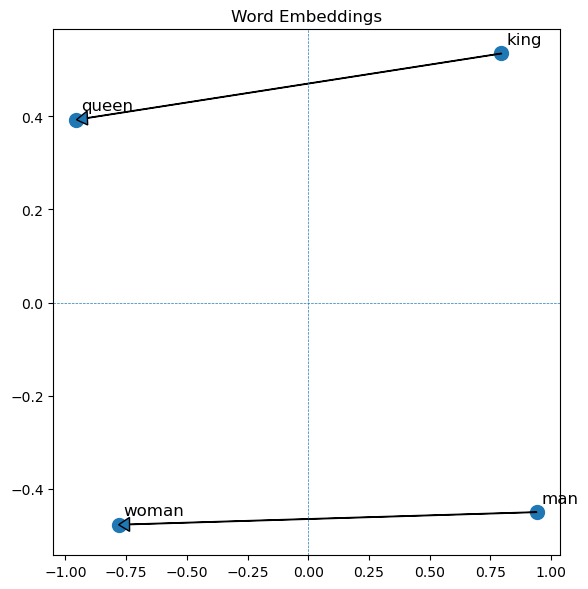

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1) Toy embeddings (latent dimensions; no human-readable labels)
embeddings = {
    "man":   [0.6, -0.2, 0.8, 0.9, -0.1, -0.9, -0.7],
    "woman": [0.7,  0.3, 0.8, -0.7, 0.1, -0.5, -0.4],
    "king":  [0.5, -0.4, 0.7, 0.8,  0.9, -0.7, -0.6],
    "queen": [0.8, -0.1, 0.8, -0.9, 0.8, -0.5, -0.9],
}

# 2) Show the vectors as a DataFrame with generic latent dims
df = pd.DataFrame.from_dict(embeddings, orient="index")
df.columns = [f"dim_{i+1}" for i in range(df.shape[1])]
print("\nWord Embedding Vectors (latent dimensions):\n")
print(df)

# 3) Build matrix and reduce to 2-D with PCA
words = list(embeddings.keys())
X = np.array([embeddings[w] for w in words])

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# 4) Plot 2-D points + labels + analogy arrows
plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], s=100)

for (x, y, w) in zip(X2[:, 0], X2[:, 1], words):
    plt.text(x + 0.02, y + 0.02, w, fontsize=12)

def arrow(a, b):
    ax, ay = X2[words.index(a)]
    bx, by = X2[words.index(b)]
    plt.arrow(ax, ay, bx - ax, by - ay, head_width=0.03, length_includes_head=True)

arrow("man", "woman")
arrow("king", "queen")

plt.title("Word Embeddings")
plt.axhline(0, linestyle="--", linewidth=0.5)
plt.axvline(0, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [17]:
df

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7
man,0.6,-0.2,0.8,0.9,-0.1,-0.9,-0.7
woman,0.7,0.3,0.8,-0.7,0.1,-0.5,-0.4
king,0.5,-0.4,0.7,0.8,0.9,-0.7,-0.6
queen,0.8,-0.1,0.8,-0.9,0.8,-0.5,-0.9


In [18]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Tokenize each document (lowercase, basic de-noising)
tokenized = [simple_preprocess(text, deacc=True, min_len=2)  # remove punctuation, keep tokens len>=2
             for text in review['ReviewText'].fillna("").tolist()]

# Train Word2Vec
w2v = Word2Vec(
    sentences=tokenized,
    vector_size=100,   # embedding dimension
    window=5,          # context window
    min_count=2,       # ignore rare words (<2 occurrences)
)

# Inspect vocabulary size
print("Vocab size:", len(w2v.wv))

# Nearest neighbors for a few words 
for probe in ["product"]:
    if probe in w2v.wv:
        print(f"\nNearest to '{probe}':")
        for term, score in w2v.wv.most_similar(probe, topn=5):
            print(f"{term:15s} {score:.3f}")

# Build simple document embeddings by averaging word vectors
def doc_vector(tokens, model):
    vectors = [model.wv[t] for t in tokens if t in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

doc_embeddings = np.vstack([doc_vector(doc, w2v) for doc in tokenized])
doc_embeddings

Vocab size: 74

Nearest to 'product':
want            0.285
is              0.243
performance     0.217
my              0.206
would           0.188


array([[ 0.00052064,  0.00331089,  0.00218705, ..., -0.00193868,
        -0.0003784 ,  0.00209106],
       [-0.00110444,  0.00051795, -0.00233621, ..., -0.00050913,
         0.00078317, -0.0037994 ],
       [-0.00526507,  0.00118895, -0.00170649, ..., -0.00081859,
        -0.00416513,  0.00042248],
       ...,
       [-0.00155003,  0.00176021, -0.00144294, ..., -0.00025236,
         0.00128769, -0.00110331],
       [ 0.00052064,  0.00331089,  0.00218705, ..., -0.00193868,
        -0.0003784 ,  0.00209106],
       [ 0.00117482,  0.00043636,  0.00147893, ...,  0.00041706,
         0.00227376,  0.00215633]], dtype=float32)

In [19]:
# import torch
# from transformers import AutoTokenizer, AutoModel

# text = "The bank raised rates near the river bank."

# tok = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# mdl = AutoModel.from_pretrained("distilbert-base-uncased")

# enc = tok(text, return_tensors="pt")
# with torch.no_grad():
#     out = mdl(**enc)                     
# token_embeddings = out.last_hidden_state[0]    

# mask = enc["attention_mask"][0].unsqueeze(-1)  
# sent_vec = (token_embeddings * mask).sum(0) / mask.sum()

# print("Tokens:", tok.convert_ids_to_tokens(enc["input_ids"][0])[:12])
# print(token_embeddings)

In [20]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Data Splitting
X = review["ReviewText"]
y = review["SentimentLabel"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [21]:
# Text preprocessing + TF–IDF in a Pipeline
#    - Preprocessor: light cleaning (URLs, non-letters, spaces, lower)
#    - Vectorizer: unigrams+bigrams, stopwords, df pruning
#    - Classifier: MultinomialNB (baseline)

def simple_clean(s):
    s = re.sub(r"(https?://\S+|www\.\S+)", " ", s)   # remove URLs
    s = re.sub(r"[^A-Za-z\s]", " ", s)               # keep letters/spaces
    s = re.sub(r"\s+", " ", s).strip().lower()       # normalize whitespace + lowercase
    return s

pipe_nb = Pipeline([
    ("tfidf", TfidfVectorizer(
        preprocessor=simple_clean,
        stop_words="english",
        ngram_range=(1, 2),   # unigrams and bigrams 
        min_df=2,             # drop very rare terms
        max_df=0.95           # drop too commons terms
    )),
    ("clf", MultinomialNB(alpha=1.0))   
])

In [22]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_nb, X_train, y_train, cv=cv, scoring="accuracy")

print("\n5-fold CV Accuracy:  ", cv_scores.mean().round(3), "±", cv_scores.std().round(3))


5-fold CV Accuracy:   1.0 ± 0.0



Test Accuracy: 1

Classification Report:
               precision    recall  f1-score   support

    negative      1.000     1.000     1.000         8
     neutral      1.000     0.714     0.833         7
    positive      0.714     1.000     0.833         5

    accuracy                          0.900        20
   macro avg      0.905     0.905     0.889        20
weighted avg      0.929     0.900     0.900        20



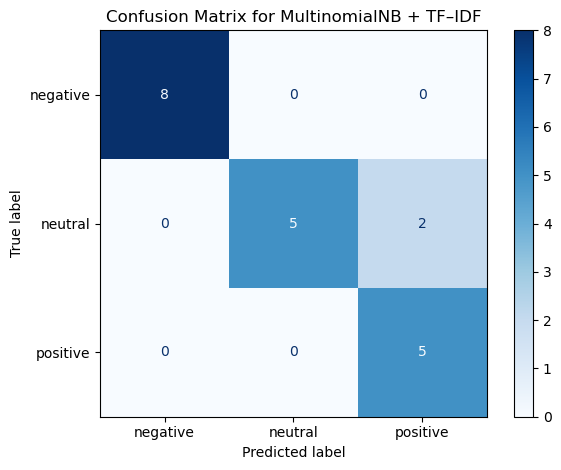

In [24]:
pipe_nb.fit(X_train, y_train)
y_pred = pipe_nb.predict(X_test)

print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix for MultinomialNB + TF–IDF")
plt.tight_layout()
plt.show()

In [25]:
vec = pipe_nb.named_steps["tfidf"]
clf = pipe_nb.named_steps["clf"]

feature_names = np.array(vec.get_feature_names_out())
class_labels  = clf.classes_
log_probs     = clf.feature_log_prob_ 

def top_terms_per_class(k=15):
    for ci, label in enumerate(class_labels):
        top_idx = np.argsort(log_probs[ci])[::-1][:k]
        print(f"\nTop terms for class = {label}:")
        print(", ".join(feature_names[top_idx]))

top_terms_per_class(k=15)


Top terms for class = negative:
stopped, working, stopped working, week, disappointed stopped, disappointed, working week, quality, low, low quality, money, money low, worth money, worth, immediately

Top terms for class = neutral:
bad great, bad, great, price, acceptable, acceptable price, works fine, alternatives, fine, fine better, better, better alternatives, works, special, quality special

Top terms for class = positive:
perfectly, perfectly buy, works perfectly, buy, performance, performance durability, impressed, impressed performance, durability, works, highly recommended, quality fast, recommended, delivery highly, delivery


In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
# from datasets import Dataset
# from sklearn.preprocessing import LabelEncoder

# # Encode labels (convert to integers)
# le = LabelEncoder()
# y_enc = le.fit_transform(y)

# data = Dataset.from_dict({"text": X.tolist(), "label": y_enc.tolist()})
# data = data.train_test_split(test_size=0.2, seed=42)
# print(data)

In [ ]:
# model_name = "distilbert-base-uncased"
# tok = AutoTokenizer.from_pretrained(model_name)

# def tokenize(batch):
#     return tok(batch["text"], truncation=True, padding="max_length", max_length=128)

# data_tok = data.map(tokenize, batched=True)

# num_labels = len(le.classes_)
# mdl = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

In [ ]:
# args = TrainingArguments(
#     output_dir="./output",           # where to save checkpoints and logs
#     num_train_epochs=2,              # train iteration
#     per_device_train_batch_size=2,   # train batch size per GPU/CPU
#     per_device_eval_batch_size=2,    # eval batch size per GPU/CPU
#     learning_rate=2e-5,              # common fine-tuning LR for BERT-like models
#     weight_decay=0.01,               # L2 regularization on weights
# )

# trainer = Trainer(
#     model=mdl,
#     args=args,
#     train_dataset=data_tok["train"],
#     eval_dataset=data_tok["test"],
#     processing_class=tok,
# )


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# trainer.train()

In [ ]:
# metrics = trainer.evaluate()
# print(metrics)

In [ ]:
# import numpy as np
# from sklearn.metrics import accuracy_score, classification_report

# # Run prediction on the test set
# pred_out = trainer.predict(data_tok["test"])
# y_pred = pred_out.predictions.argmax(axis=1)
# y_true = np.array(data_tok["test"]["label"])

# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("\nClassification report:\n")
# print(classification_report(y_true, y_pred, target_names=le.classes_, digits=3))


In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForMaskedLM

# text = "The bank raised [MASK] near the river bank."

# tok = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# mdl = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")

# enc = tok(text, return_tensors="pt")
# with torch.no_grad():
#     out = mdl(**enc)

# mask_index = (enc["input_ids"] == tok.mask_token_id).nonzero(as_tuple=True)[1]
# logits = out.logits[0, mask_index]

# top_tokens = torch.topk(logits, k=5, dim=-1).indices[0]
# predictions = tok.convert_ids_to_tokens(top_tokens.tolist())

# print("Masked token predictions:", predictions)
